In [ ]:
# Load MNIST
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check top 5 samples
print("Top 5 training samples:")
for i in range(5):
    print(f"Image {i}: shape {X_train[i].shape}, label: {y_train[i]}")
    print(f"Pixel range: [{X_train[i].min()}, {X_train[i].max()}]")
print()

# Dataset info
print(f"Training data: {X_train.shape}")  # (60000, 28, 28)
print(f"Training labels: {y_train.shape}")  # (60000,)
print(f"Test data: {X_test.shape}")  # (10000, 28, 28)
print(f"Unique labels: {np.unique(y_train)}")  # [0-9]
print(f"First 10 labels: {y_train[0:10]}")  # Show first 10 actual labels

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top 5 training samples:
Image 0: shape (28, 28), label: 5
Pixel range: [0, 255]
Image 1: shape (28, 28), label: 0
Pixel range: [0, 255]
Image 2: shape (28, 28), label: 4
Pixel range: [0, 255]
Image 3: shape (28, 28), label: 1
Pixel range: [0, 255]
Image 4: shape (28, 28), label: 9
Pixel range: [0, 255]

Training data: (60000, 28, 28)
Training labels: (60000,)
Test data: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
First 10 labels: [5 0 4 1 9 2 1 3 1 4]


In [ ]:
# 1. Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. One-hot encode labels (10 classes: digits 0-9)
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verify
print("After preprocessing:")
print(f"X_train min/max: {X_train.min()}, {X_train.max()}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"First label one-hot: {y_train[0]}")

After preprocessing:
X_train min/max: 0.0, 1.0
X_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
First label one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Converts 28×28 → 784
model.add(layers.Dense(10, activation='softmax'))  # Output layer

# Show model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6921 - loss: 1.1925 - val_accuracy: 0.8963 - val_loss: 0.4491
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8745 - loss: 0.4937 - val_accuracy: 0.9080 - val_loss: 0.3656
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8859 - loss: 0.4294 - val_accuracy: 0.9145 - val_loss: 0.3325
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8923 - loss: 0.3912 - val_accuracy: 0.9153 - val_loss: 0.3142
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8990 - loss: 0.3716 - val_accuracy: 0.9210 - val_loss: 0.3017
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9022 - loss: 0.3579 - val_accuracy: 0.9227 - val_loss: 0.2933
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9033 - loss: 0.3491 - val_accuracy: 0.9232 - val_loss: 0.2864
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9046 - loss: 0.3416 - 

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Test accuracy: 0.9151
Test loss: 0.3094


In [ ]:
# Get predictions (probabilities)
pred_probs = model.predict(X_test)

# Convert probabilities → class labels
pred_labels = np.argmax(pred_probs, axis=1)

# Convert one-hot y_test → class labels
true_labels = np.argmax(y_test, axis=1)

# Print first 10 actual vs predicted
print("First 10 True Labels:     ", true_labels[:10])
print("First 10 Predicted Labels:", pred_labels[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
First 10 True Labels:      [7 2 1 0 4 1 4 9 5 9]
First 10 Predicted Labels: [7 2 1 0 4 1 4 9 6 9]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


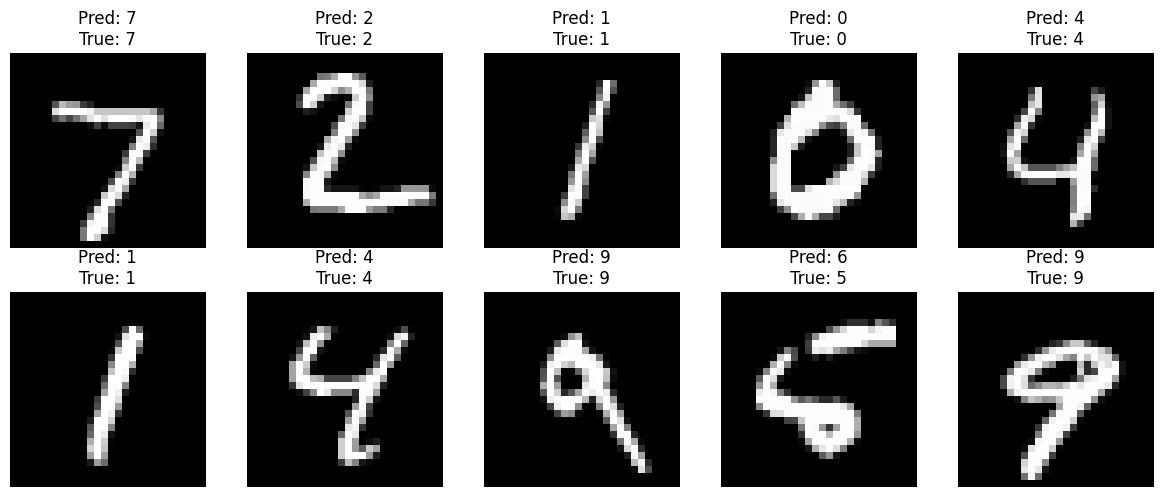

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on first 10 test images
preds = model.predict(X_test[:10])
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)

fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f"Pred: {pred_labels[i]}\nTrue: {true_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()